## What is the question being researched

  **How to visualize muilt-dimensional data(more than 3-D)?**

* There might be more than 3 variables would affect the target value. Like if I need to predict the weather in 3 days, I need to take care about the temperature, humidity, visibility, windy speed and so on.

* If I need to search how to predict the weather after 3 days, I need to visualize many variables which would affect the weather and then show the real result of the weather after 3 days.

* But for the human being, we only can see and plot the up to 3 dimension. So, how to visualize the high dimensions data which is more than 3 dimensions?

* Data visualization is a good way to help us understand data and know the relation of all data.


# Import necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and merge datasets

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

# Understand dataset features and values

In [3]:
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   

   alcohol  quality wine_type quality_label  
0     12.2        8     white          high  
1      9.9        5       red           low  
2     12.0        7     white        medium  
3      9.5        6     white        medium  
4      8.9        6     white        medium

### Understanding Wine and Types

Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

### Understanding Wine Attributes and Properties 


- **fixed acidity:** Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in $\frac{g(tartaricacid)}{dm^3}$ in the dataset.


- **volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in $\frac{g(aceticacid)}{dm^3}$ in the dataset.


- **citric acid:** This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **residual sugar:** This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **chlorides:** This is usually a major contributor to saltiness in wine. It's usually expressed in $\frac{g(sodiumchloride)}{dm^3}$ in the dataset.


- **free sulfur dioxide:** This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in $\frac{mg}{dm^3}$ in the dataset.


- **total sulfur dioxide:** This is the sum total of the bound and the free sulfur dioxide ($SO_2$). Here, it's expressed in $\frac{mg}{dm^3}$. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.


- **density:** This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in $\frac{g}{cm^3}$.


- **pH:** Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


- **sulphates:** These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in $\frac{g(potassiumsulphate)}{dm^3}$ in the dataset.


- **alcohol:** Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).


- **quality:** Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


- **wine_type:** Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.


- **quality_label:** This is a derived attribute from the `quality` attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes. 

# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

In [4]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [5]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

# Multivariate Analysis

## Visualizing 2 dimensions

/var/folders/1r/4wsb9xsn57qg4s1b2wwvhblm0000gn/T/ipykernel_16565/988092989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wines.corr()


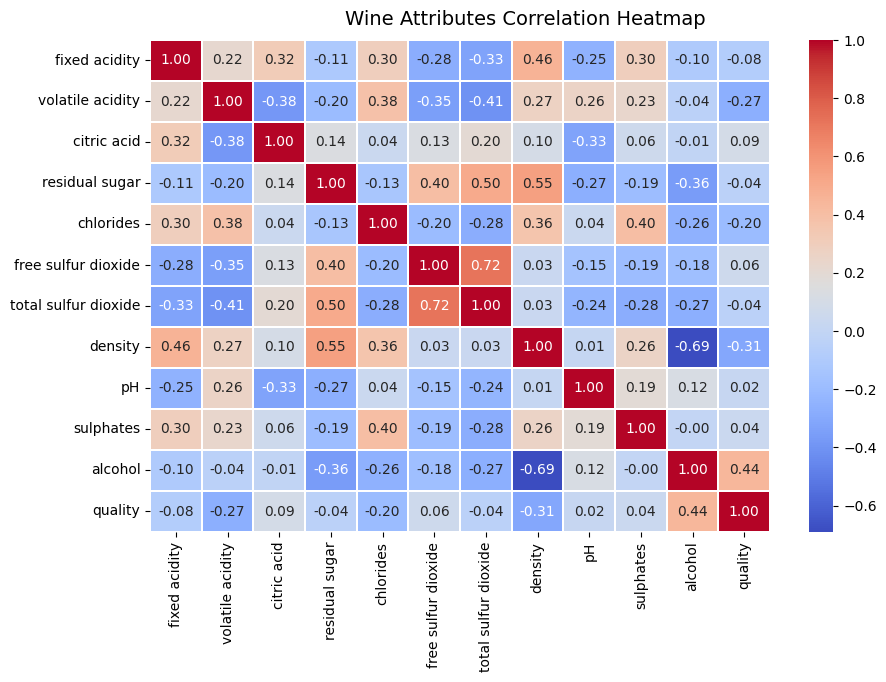

In [6]:
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

The gradients in the heatmap vary based on the strength of the correlation and it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

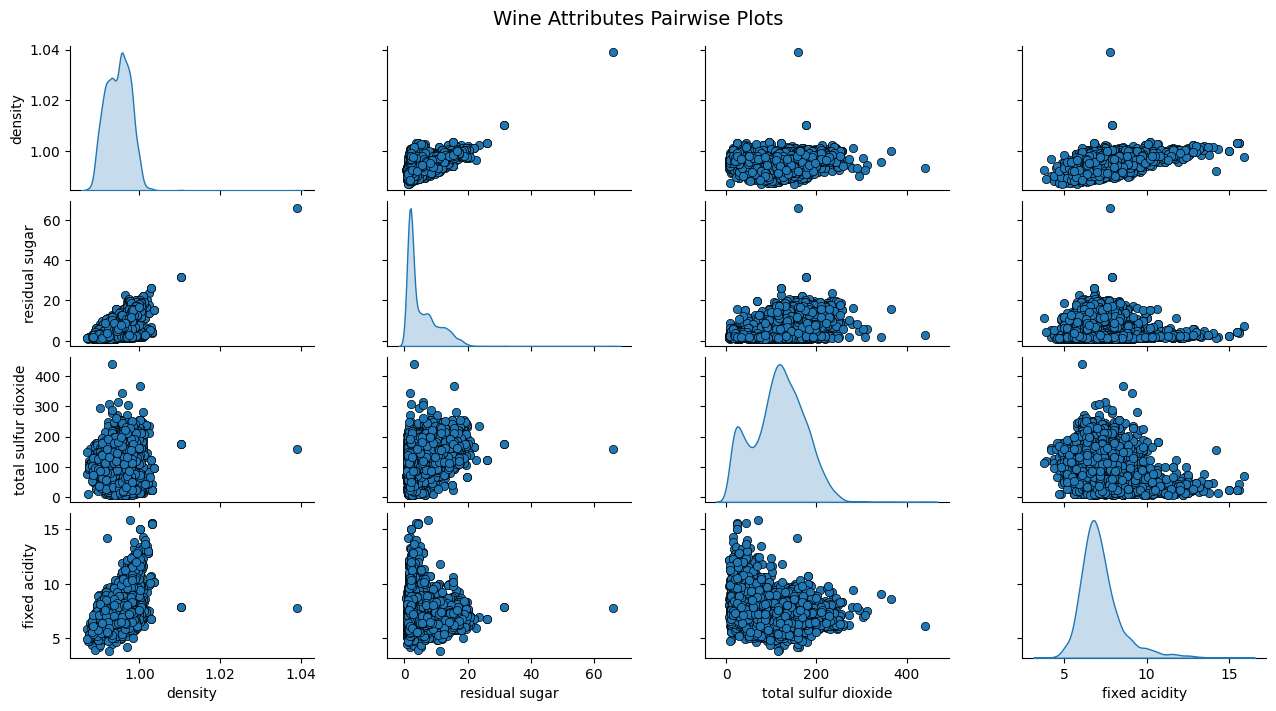

In [10]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Based on the above plot, we can see that scatter plots are also a decent way of observing potential relationships or patterns in two-dimensions for data attributes.

> An important point to note about pairwise scatter plots is that the plots are actually symmetric. The scatterplot for any pair of attributes (X, Y) looks different from the same attributes in (Y, X) only because the vertical and horizontal scales are different. It does not contain any new information.

Another way of visualizing is violin plots, which are another effective way to visualize grouped numeric data using kernel density plots (depicts probability density of the data at different values).

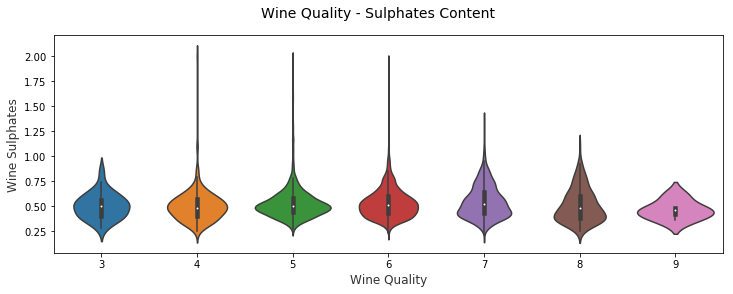

In [22]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

* Because the data of wine quality scale is not small, it can be divided and show in the box plot.
* Thus, we can use box plot to show the small scale data!

## Visualizing 3 dimensions

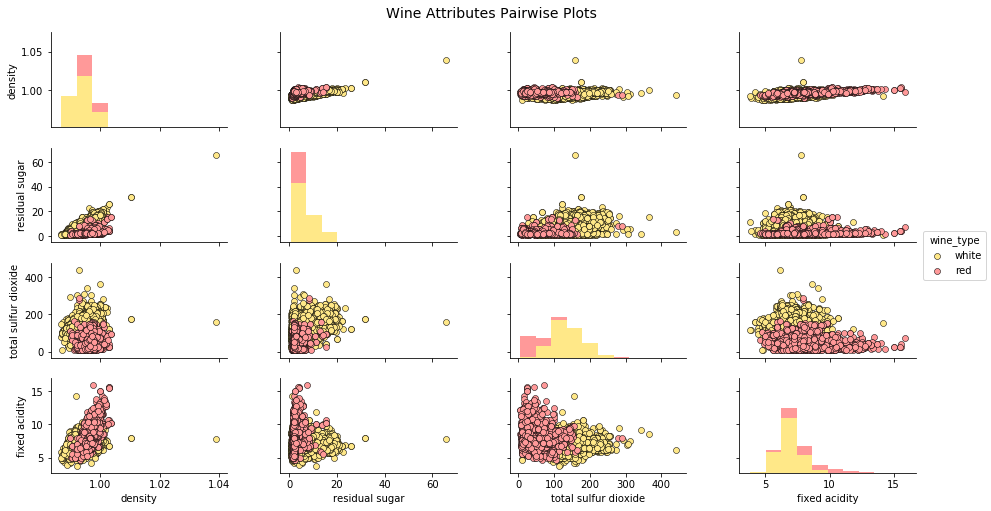

In [23]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

The above plot enables you to check out correlations and patterns and also compare around wine groups. Like we can clearly see total sulfur dioxide and residual sugar is higher for white wine as compared to red.

Let’s look at strategies for visualizing three continuous, numeric attributes. One way would be to have two dimensions represented as the regular length (x-axis)and breadth (y-axis) and also take the notion of depth (z-axis) for the third dimension.

### Three Continuous Numeric attributes

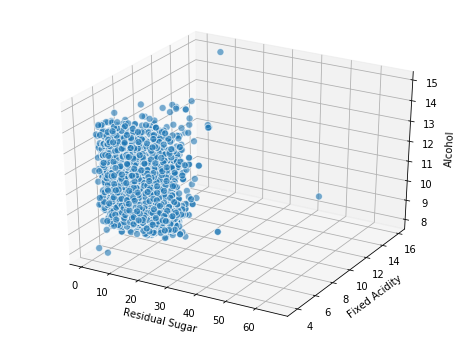

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

We can also still leverage the regular 2-D axes and introduce the notion of size as the third dimension (essentially a bubble chart) where the size of the dots indicate the quantity of the third dimension.

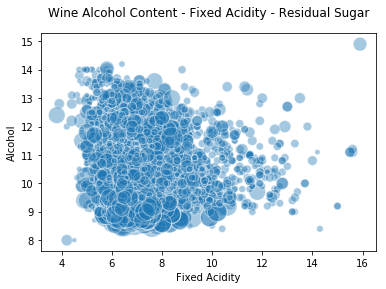

In [25]:
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar',y=1.05)

Thus we can see how the chart above is not a conventional scatter plot but more of a bubble chart with varying point sizes (bubbles) based on the quantity of residual sugar . Of course its not always that you will find definite patterns in the data like in this case, we see varying sizes across the other two dimensions.

Considering visualization for three mixed attributes, we can use the notion of hue for separating our groups in one of the categorical attributes while using conventional visualizations like scatter plots for visualizing two dimensions for numeric attributes.

/Users/yufei/anaconda3/envs/conx/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


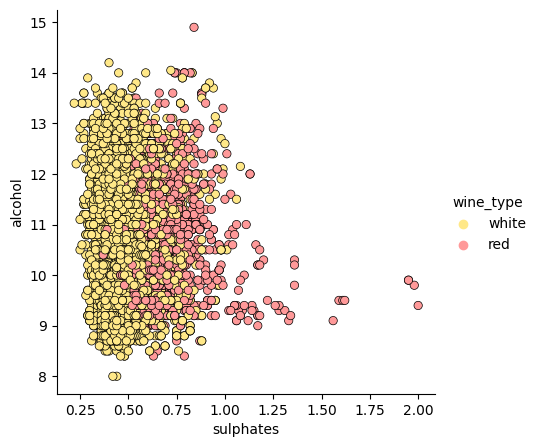

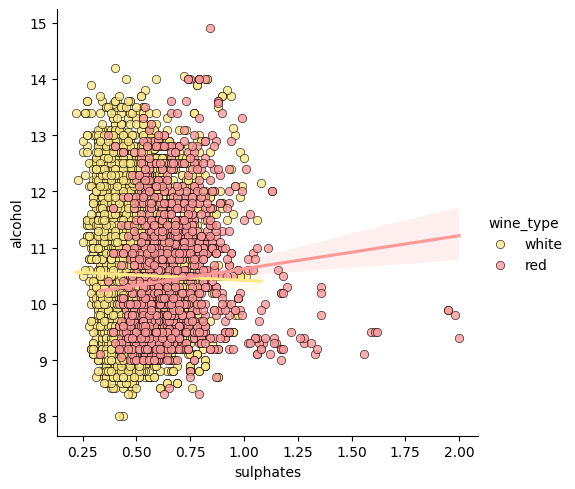

In [18]:
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5,
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

## Visualizing 4 dimensions

Based on our discussion earlier, we leverage various components of the charts visualize multiple dimensions. One way to visualize data in four dimensions is to use depth and hue as specific data dimensions in a conventional plot like a scatter plot.

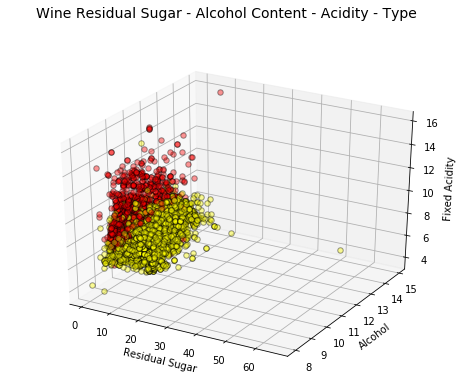

In [32]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

The wine_type attribute is denoted by the hue which is quite evident from the above plot. Also, while interpreting these visualizations start getting difficult due to the complex nature of the plots, you can still gather insights like fixed acidity is higher for red wines and residual sugar is higher for white wines. Of course if there were some association between alcohol and fixed acidity we might have seen a gradually increasing or decreasing plane of data points showing some trend.

Another strategy is to keep a 2-D plot but use hue and data point size as data dimensions. Typically this would be a bubble chart similar to what we visualized earlier.

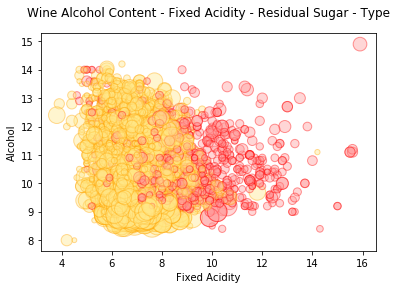

In [33]:
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

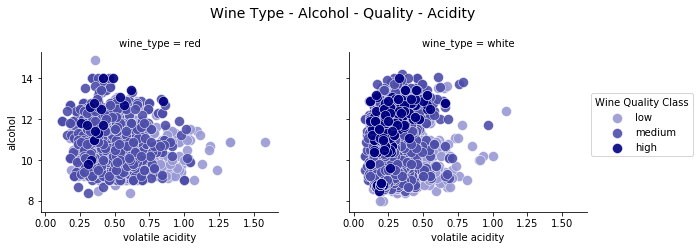

In [34]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

## Visualizing five dimensions

Once again following a similar strategy as we followed in the previous section, to visualize data in five dimensions, we leverage various plotting components. Let’s use depth, hue and size to represent three of the data dimensions besides regular axes representing the other two dimensions. Since we use the notion of size, we will be basically plotting a three dimensional bubble chart.

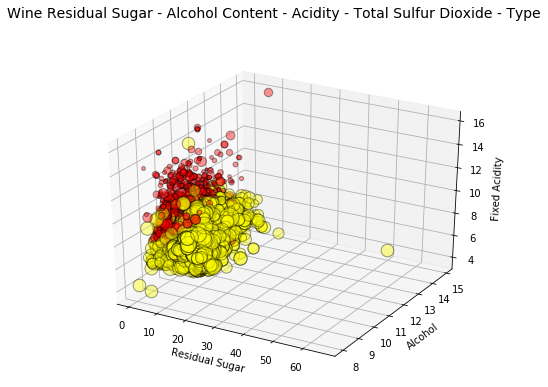

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

## Training the data

In [19]:
wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.17         0.74           12.80      0.045   
1               7.7              0.64         0.21            2.20      0.077   
2               6.8              0.39         0.34            7.40      0.020   
3               6.3              0.28         0.47           11.20      0.040   
4               7.4              0.35         0.20           13.90      0.054   
...             ...               ...          ...             ...        ...   
6492            7.6              0.32         0.58           16.75      0.050   
6493            5.6              0.28         0.27            3.90      0.043   
6494            6.4              0.37         0.20            5.60      0.117   
6495            6.5              0.26         0.50            8.00      0.051   
6496            7.2              0.62         0.06            2.70      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    24.0                 126.0  0.99420  3.26       0.38   
1                    32.0                 133.0  0.99560  3.27       0.45   
2                    38.0                 133.0  0.99212  3.18       0.44   
3                    61.0                 183.0  0.99592  3.12       0.51   
4                    63.0                 229.0  0.99888  3.11       0.50   
...                   ...                   ...      ...   ...        ...   
6492                 43.0                 163.0  0.99990  3.15       0.54   
6493                 52.0                 158.0  0.99202  3.35       0.44   
6494                 61.0                 183.0  0.99459  3.24       0.43   
6495                 46.0                 197.0  0.99536  3.18       0.47   
6496                 15.0                  85.0  0.99746  3.51       0.54   

      alcohol  quality wine_type quality_label  
0        12.2        8     white          high  
1         9.9        5       red           low  
2        12.0        7     white        medium  
3         9.5        6     white        medium  
4         8.9        6     white        medium  
...       ...      ...       ...           ...  
6492      9.2        5     white           low  
6493     10.7        7     white        medium  
6494      9.5        5     white           low  
6495      9.5        5     white           low  
6496      9.5        5       red           low  

[6497 rows x 14 columns]

In [22]:
X_2 = wines.drop(['wine_type','quality_label'], axis=1)
y_2 = wines['wine_type'] 

In [23]:
X_2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.17         0.74           12.80      0.045   
1               7.7              0.64         0.21            2.20      0.077   
2               6.8              0.39         0.34            7.40      0.020   
3               6.3              0.28         0.47           11.20      0.040   
4               7.4              0.35         0.20           13.90      0.054   
...             ...               ...          ...             ...        ...   
6492            7.6              0.32         0.58           16.75      0.050   
6493            5.6              0.28         0.27            3.90      0.043   
6494            6.4              0.37         0.20            5.60      0.117   
6495            6.5              0.26         0.50            8.00      0.051   
6496            7.2              0.62         0.06            2.70      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    24.0                 126.0  0.99420  3.26       0.38   
1                    32.0                 133.0  0.99560  3.27       0.45   
2                    38.0                 133.0  0.99212  3.18       0.44   
3                    61.0                 183.0  0.99592  3.12       0.51   
4                    63.0                 229.0  0.99888  3.11       0.50   
...                   ...                   ...      ...   ...        ...   
6492                 43.0                 163.0  0.99990  3.15       0.54   
6493                 52.0                 158.0  0.99202  3.35       0.44   
6494                 61.0                 183.0  0.99459  3.24       0.43   
6495                 46.0                 197.0  0.99536  3.18       0.47   
6496                 15.0                  85.0  0.99746  3.51       0.54   

      alcohol  quality  
0        12.2        8  
1         9.9        5  
2        12.0        7  
3         9.5        6  
4         8.9        6  
...       ...      ...  
6492      9.2        5  
6493     10.7        7  
6494      9.5        5  
6495      9.5        5  
6496      9.5        5  

[6497 rows x 12 columns]

* Show the features after dropping the above features

In [24]:
Feature_AfterDrop = X_2.columns
Feature_AfterDrop

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

* Use preprocessing.scale() to convert the X_2 to array data type which is easy for Naive Bayes model to train

In [25]:
from sklearn import preprocessing
X_2 = preprocessing.scale(X_2)

* Use train_test_split to split the X, y to train data and test data

In [26]:
from sklearn.model_selection import train_test_split
train_X_2, test_X_2, train_y_2, test_y_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=10)
train_X_2.shape, train_y_2.shape

((4547, 12), (4547,))

* Use the sklearn module to train the data

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_2 = GaussianNB()
nb_2.fit(train_X_2, train_y_2)

GaussianNB()

* Use the test set to test the accuracy of the model

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred_2 = nb_2.predict(test_X_2)
cm_2 = confusion_matrix(pred_2, test_y_2)
cm_2

array([[ 442,   43],
       [  14, 1451]])

In [29]:
accuracy_score(pred_2, test_y_2)

0.9707692307692307

We can see the accuracy is high as 97%